<a href="https://colab.research.google.com/github/Az-Data/Portfolio/blob/master/Note%20Cards%20to%20Digital%20Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Note Cards to Digital Notes

I have a lot of physical cue cards that I need to place in my obsidian notes. So I created a script that uses Google's Vision API and OpenAI's API to extract the text from the pictures of my Note cards and place the text in a text file.

## Setup

Upload the:
- service account Credentials json to the session storage to access the Google vision API
- .env file that contains your OpenAI API Key

In [ ]:
import requests
import os

url = "https://raw.githubusercontent.com/Az-Data/Portfolio/master/utilities.py"
file_name = "utilities.py"  # Name to save the file locally

# Download the utilites setup file
response = requests.get(url)
if response.status_code == 200:
    with open(file_name, "wb") as f:
        f.write(response.content)
    print(f"{file_name} downloaded successfully.")
else:
    print("Failed to download the file.")

utilities.py downloaded successfully.


In [ ]:
# Executing the utilities.py file and install need packages
%%capture
%run utilities.py

!pip install python-dotenv google-cloud-vision

## Execution

In [ ]:
from google.cloud import vision
from google.cloud.vision_v1 import types
from dotenv import load_dotenv, find_dotenv
import os
import openai
import io

load_dotenv(find_dotenv())

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "serviceAccountCred.json"
openai.api_key = os.environ.get('OPENAI_API_KEY')

In [ ]:
def extract_text(image_path):
    client = vision.ImageAnnotatorClient()

    with io.open(image_path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)
    response = client.text_detection(image=image)
    texts = response.text_annotations

    if response.error.message:
        raise Exception(response.error.message)

    # Extracted text
    return texts[0].description if texts else ""


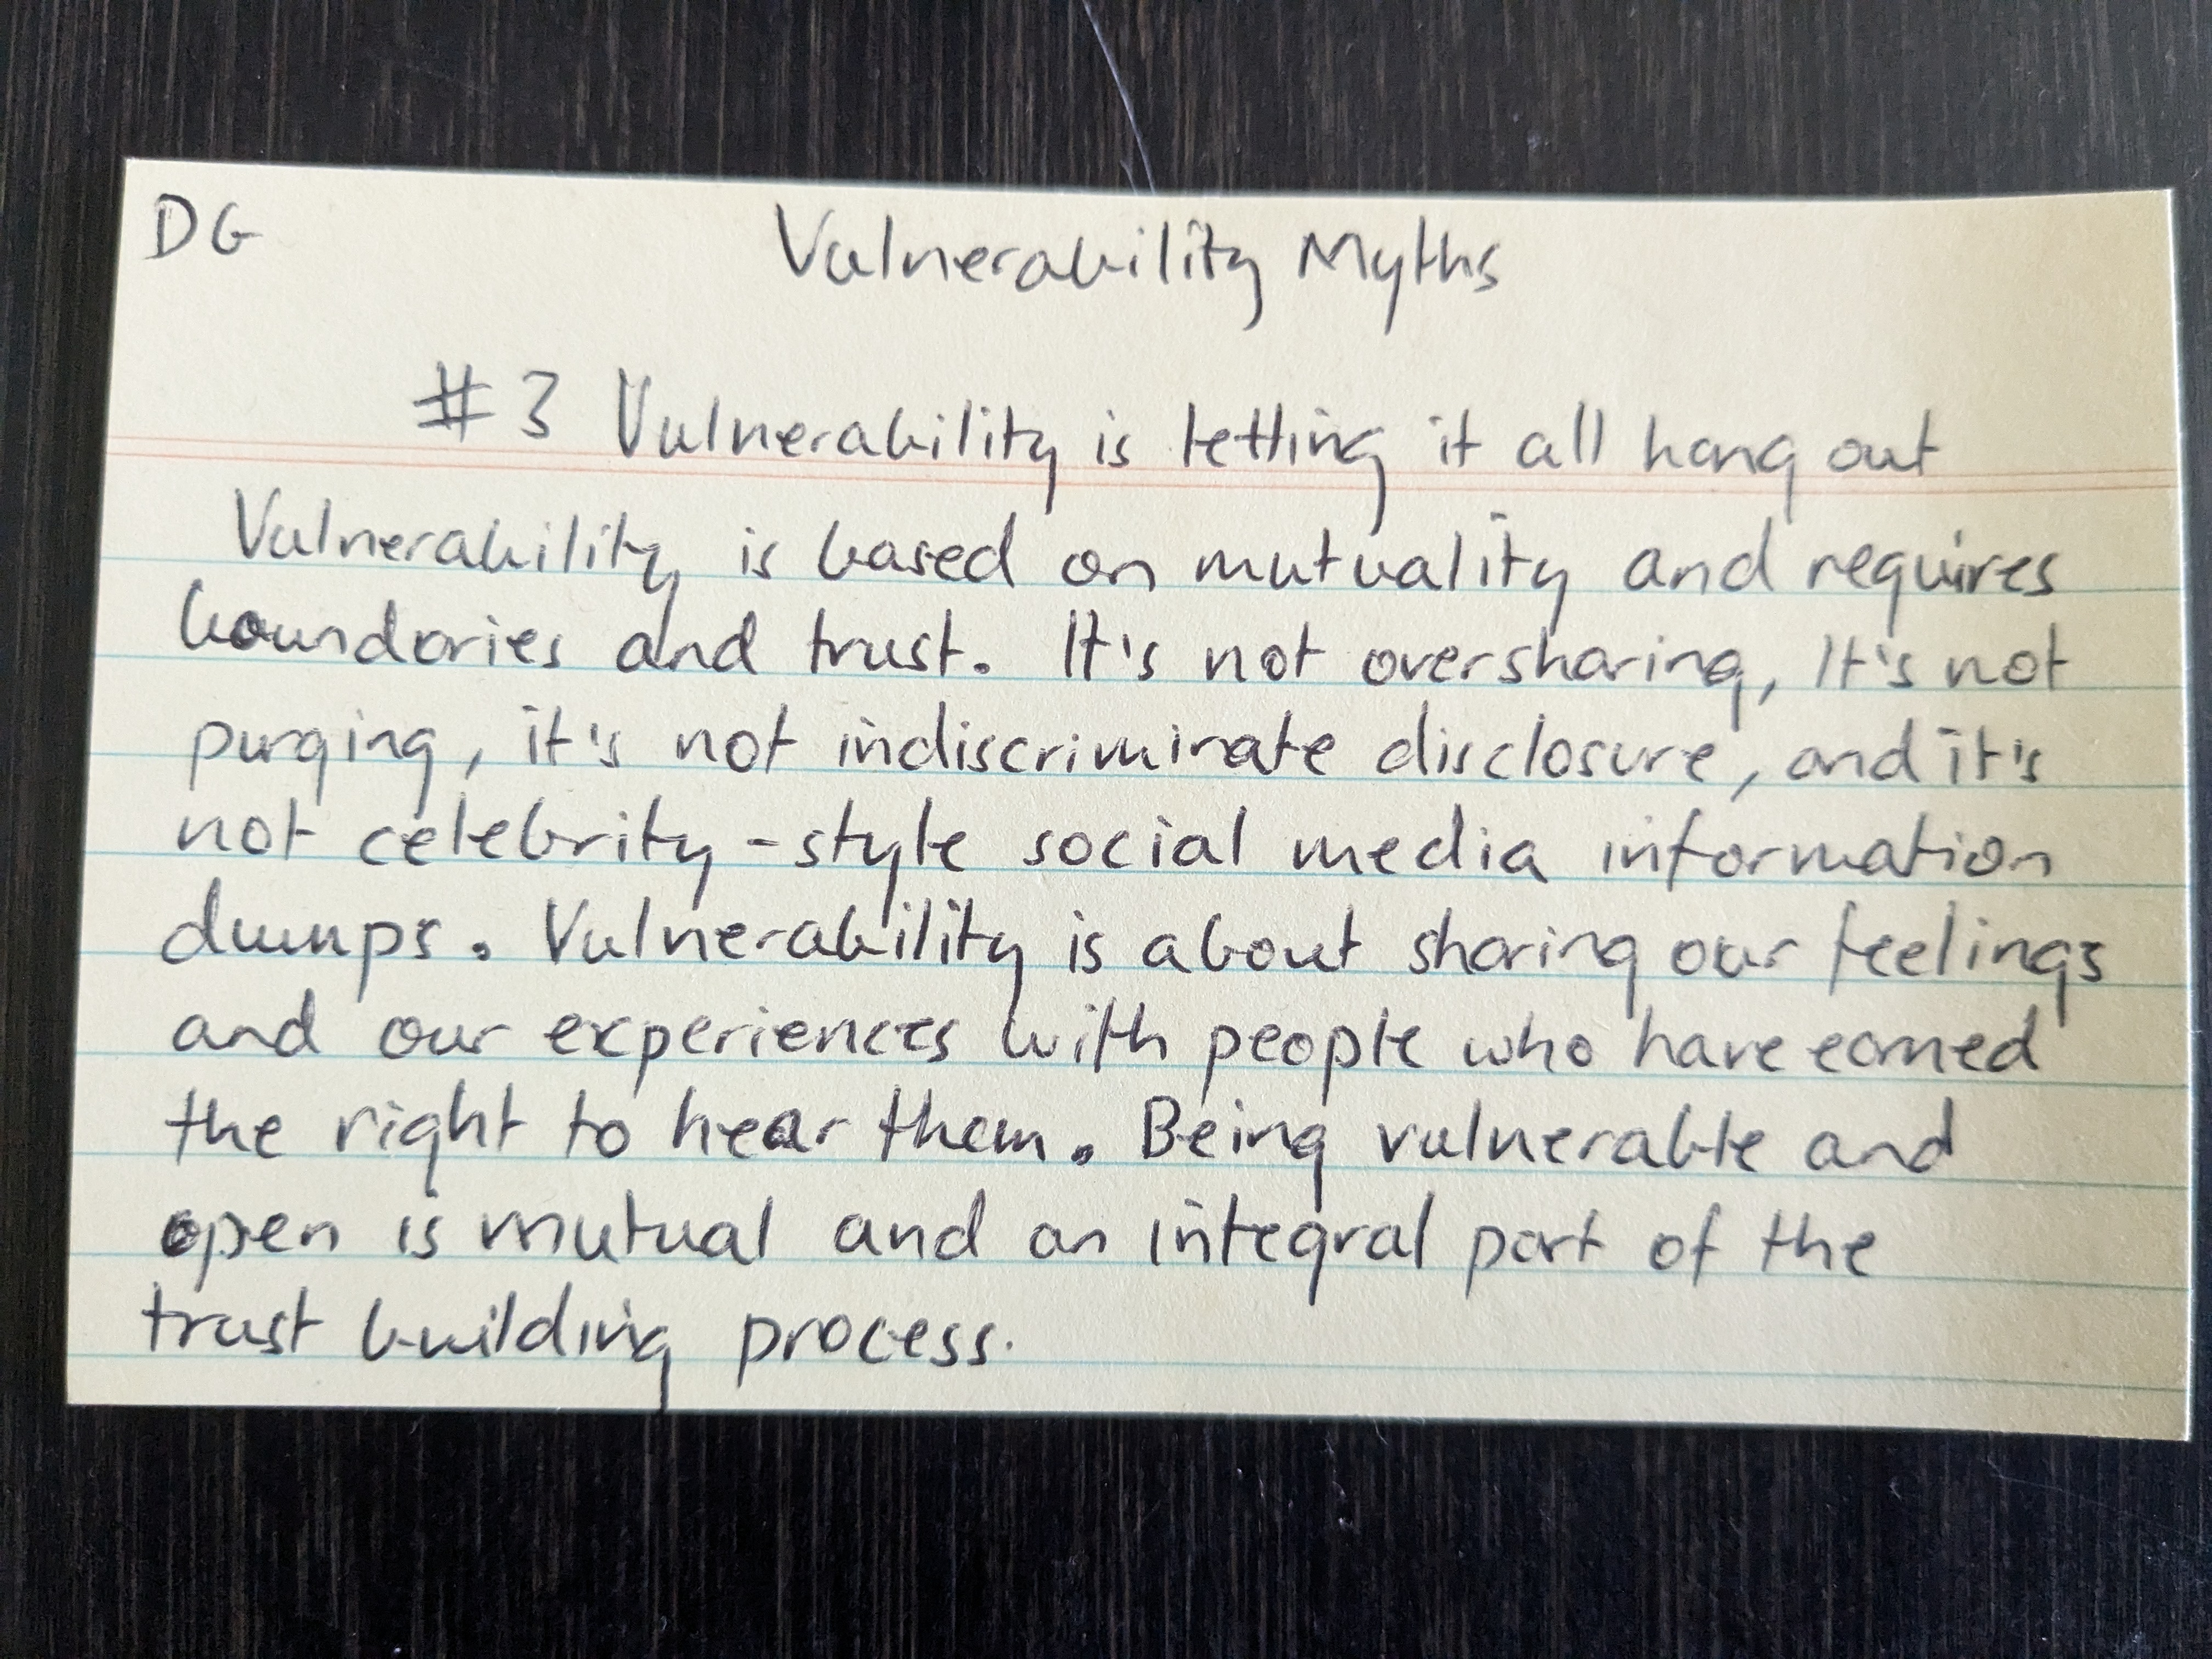

In [ ]:
# Display the pictures of my note cards
from IPython.display import Image

Image("/content/Data/Note Card Pictures/PXL_1.jpg")
# Image("/content/Data/Note Card Pictures/PXL_2.jpg")

In [ ]:
client = openai.OpenAI()

def process_text(extracted_text):

    messages = [
            {"role": "system", "content": "There are sometimes titles and subtitles in the first few lines, create a new line when this occurs. Be sure to eliminate any other new lines"},
            {"role": "system", "content": "If the first set of letters are 'DG' or similar Convert to label '*Daring Greatly*', If the first set of letters are 'TGOI' or similar Convert to label '*The gift of imperfection*', if it is neither use the previous label"},
            {"role": "user", "content": f"Process this extracted text and stay as close to the orginal text as possible as well as making the text grammtically correct: {extracted_text}"}
        ]

    # Generate a response from the model
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        response_format={"type": "text"},
    )

    # Return the assistant's message (the cover letter)
    return response.choices[0].message.content



In [ ]:

# Define the folder path
folder_path = r"Data/Note Card Pictures"

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Making sure to only process the .jpg images
    if filename.lower().endswith(".jpg"):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)

        extracted_text = extract_text(image_path)
        processed_text = process_text(extracted_text)

        # save to the text file, so I can copy it later into my obsidian notes
        with open("BreneBrownNotes.txt", "a") as f:
            f.write(processed_text + "\n\n\n\n")  # Add a newline between paragraphs for readability

print("Processing complete. View the BreneBrownNotes.txt.")


Processing complete. View the BreneBrownNotes.txt.


In [ ]:
# check that notes were written to the text file
with open("BreneBrownNotes.txt", "r") as f:
  print(f.read())

*Daring Greatly*  
Shoring appropriately, with boundaries, means shoring with people with whom we've developed relationships that can bear the weight of our story. The result of this mutually respectful vulnerability is increased connection, trust, and engagement. It is an incremental process. We need to feel trust to be vulnerable, and we need to be vulnerable in order to trust.



*Daring Greatly*  
Vulnerability Myths  
#3 Vulnerability is letting it all hang out  
Vulnerability is based on mutuality and requires boundaries and trust. It's not oversharing, it's not purging, it's not indiscriminate disclosure, and it's not celebrity-style social media information dumps. Vulnerability is about sharing our feelings and our experiences with people who have earned the right to hear them. Being vulnerable and open is mutual and an integral part of the trust-building process.




